In [34]:
import numpy as np

import matplotlib.pyplot as plt

import csv

import pandas as pd





# Read each csv file into a seperate dataframe


df_470_8 = pd.read_csv("470_8.csv", header=None, dtype=np.float64)
df_470_30 = pd.read_csv("470_30.csv", header=None, dtype=np.float64)
df_610_8 = pd.read_csv("610_8.csv", header=None, dtype=np.float64)
df_610_30 = pd.read_csv("610_30.csv", header=None, dtype=np.float64)


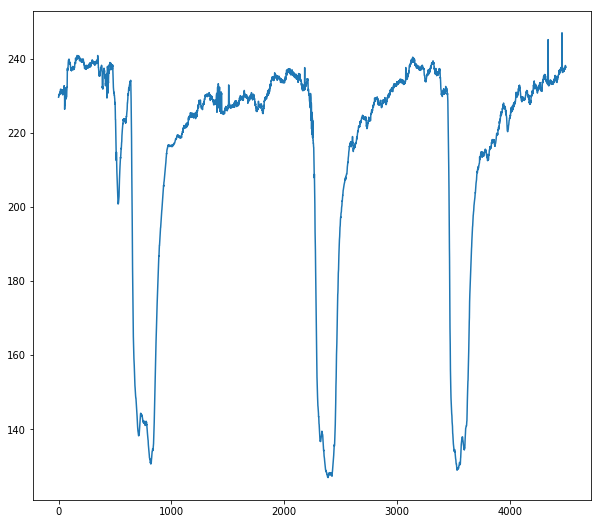

In [69]:
a = df_470_8[0].values
b = df_470_30[0].values
c = df_610_8[0].values
d = df_610_30[0].values


plt.figure()

plt.plot(d) #can be used to plot any of the dataframes

plt.show()




plt.rcParams['figure.figsize'] = (10, 9)

standard deviation fixed-lag: 933.293
standard deviation kalman: 933.291
[226.8170654  234.73385453 233.6333685  ... 237.56863817 237.60034207
 237.62725523]


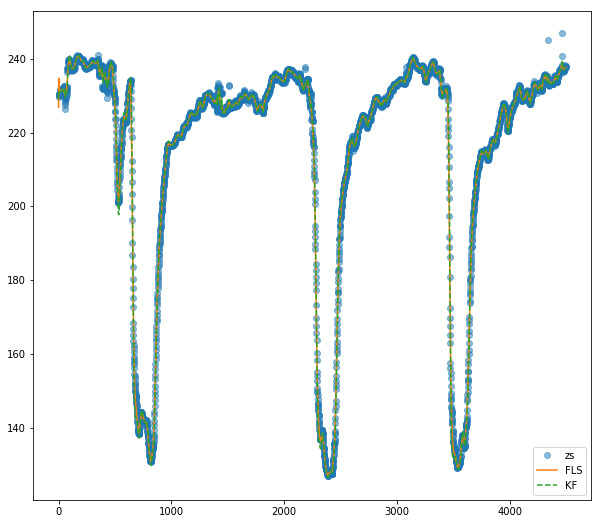

In [70]:
from filterpy.kalman import FixedLagSmoother, KalmanFilter
import numpy.random as random

fls = FixedLagSmoother(dim_x=2, dim_z=1, N=8)

fls.x = np.array([0., .5])
fls.F = np.array([[1.,1.],
                  [0.,1.]])

fls.H = np.array([[1.,0.]])
fls.P *= 200
fls.R *= 5.
fls.Q *= 0.001

kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([0., .5])
kf.F = np.array([[1.,1.],
                 [0.,1.]])
kf.H = np.array([[1.,0.]])
kf.P *= 200
kf.R *= 1
kf.Q *= 0.0002

N = 4 # size of lag



#set zs equal to dataframe variable
zs = d

nom =  np.array([t/2. for t in range (0, len(zs))])

for z in zs:
    fls.smooth(z)
    
kf_x, _, _, _ = kf.batch_filter(zs)
x_smooth = np.array(fls.xSmooth)[:, 0]


fls_res = abs(x_smooth - nom)
kf_res = abs(kf_x[:, 0] - nom)

plt.plot(zs,'o', alpha=0.5, marker='o', label='zs')
plt.plot(x_smooth, label='FLS')
plt.plot(kf_x[:, 0], label='KF', ls='--')
plt.legend(loc=4)

print('standard deviation fixed-lag: {:.3f}'.format(np.mean(fls_res)))
print('standard deviation kalman: {:.3f}'.format(np.mean(kf_res)))
print(x_smooth[:])#input frame value to print smoothed x val at that point

#df.to_csv('470_8.csv')

In [71]:
print(zs.shape)
zs = zs.reshape((len(zs), 1))
print(zs.shape)

zs = pd.DataFrame(zs, columns = ['Original'])
smoothedVals = pd.DataFrame(x_smooth[:], columns = ['Smoothed'])
print(zs)
print(smoothedVals)

(4498,)
(4498, 1)
        Original
0     229.646022
1     229.976253
2     230.103923
3     230.335884
4     230.062270
5     230.500109
6     230.139988
7     230.315628
8     230.380820
9     230.345455
10    230.650815
11    230.434331
12    230.830358
13    231.134665
14    231.097300
15    231.181869
16    231.538350
17    231.653518
18    231.817129
19    231.762821
20    231.138401
21    231.190829
22    230.714065
23    231.167189
24    231.613344
25    231.486025
26    231.736199
27    231.447446
28    231.530741
29    231.295519
...          ...
4468  236.321567
4469  236.713435
4470  236.903411
4471  237.327420
4472  237.220174
4473  236.574643
4474  237.115679
4475  237.220048
4476  236.755429
4477  237.019274
4478  236.573719
4479  236.879551
4480  236.988746
4481  236.727551
4482  236.793706
4483  237.318745
4484  237.237330
4485  237.634433
4486  237.416288
4487  237.477907
4488  237.629403
4489  237.546368
4490  237.611571
4491  237.572219
4492  237.209518
4493  238.208

In [72]:
MergedDf = pd.merge(zs, smoothedVals, left_index=True, right_index = True)

print(MergedDf.shape)
print(MergedDf)


(4498, 2)
        Original    Smoothed
0     229.646022  226.817065
1     229.976253  234.733855
2     230.103923  233.633369
3     230.335884  232.929260
4     230.062270  232.163763
5     230.500109  231.775360
6     230.139988  231.195469
7     230.315628  230.722450
8     230.380820  231.062359
9     230.345455  231.043844
10    230.650815  231.055458
11    230.434331  231.128868
12    230.830358  231.177964
13    231.134665  231.228935
14    231.097300  231.295183
15    231.181869  231.316206
16    231.538350  231.359280
17    231.653518  231.437565
18    231.817129  231.499255
19    231.762821  231.570789
20    231.138401  231.609720
21    231.190829  231.621994
22    230.714065  231.619214
23    231.167189  231.551778
24    231.613344  231.532679
25    231.486025  231.529818
26    231.736199  231.535364
27    231.447446  231.561397
28    231.530741  231.549538
29    231.295519  231.564916
...          ...         ...
4468  236.321567  238.035828
4469  236.713435  237.907155
4470

In [73]:
MergedDf.to_csv('610_30.csv')